<a href="https://colab.research.google.com/github/jcampuzano1111/K-Means-Online-Retailes/blob/main/K_Means_cluster_online_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [272]:
df = pd.read_excel("/content/drive/MyDrive/Collab/Online Retail/online_retail_II.xlsx", sheet_name=0)

In [273]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [274]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [275]:
for col in df:
    print(col)
    print(df[col].unique())
    print(f'Unique values {df[col].nunique()}')
    print("-"*110)

Invoice
[489434 489435 489436 ... 538169 538170 538171]
Unique values 28816
--------------------------------------------------------------------------------------------------------------
StockCode
[85048 '79323P' '79323W' ... 22935 22933 21120]
Unique values 4632
--------------------------------------------------------------------------------------------------------------
Description
['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... '*Boombox Ipod Classic' 'faulty'
 'Dotcom sales']
Unique values 4681
--------------------------------------------------------------------------------------------------------------
Quantity
[   12    48    24    10    18     3    16     4     2     6     8     1
    28    30    60    32    56     9    25    36    20   -12    -6    -4
   -24    -3    -2   576   288    27   -96    64   160  -240  -192     5
    -1    72    50    54   -50     7   800    11    58   192    96   144
   100   180   216    15   240    22   108  

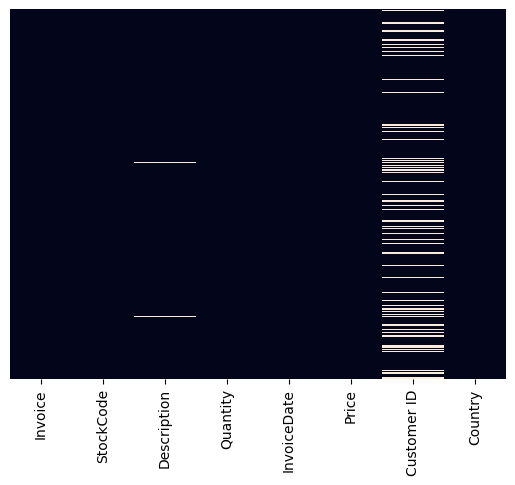

In [276]:
plt.figure()
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) #white is the missing data in columns
plt.show()

In [277]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
missing_summary = pd.DataFrame({"Missing": missing, "%": missing_pct})
print(missing_summary)

             Missing                    %
Customer ID   107927                20.54
Description     2928                 0.56
StockCode          0                 0.00
Invoice            0                 0.00
Quantity           0                 0.00
InvoiceDate        0                 0.00
Price              0                 0.00
Country            0                 0.00


In [278]:
df.isna().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [279]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [280]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [281]:
df.describe(include='O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [282]:
df[df['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


In [283]:
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array([nan, 'C', 'A'], dtype=object)

In [284]:
df[df["Invoice"].astype(str).str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [285]:
df[df["Invoice"].astype(str).str.len() != 6]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [286]:
df["StockCode"] = df["StockCode"].astype(str)
df[(df["StockCode"].str.match("^\\d{5}$") == False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]$") == False)]["StockCode"].unique()

array(['POST', '79323LP', '15056BL', 'D', '79323GR', 'DCGS0058',
       'DCGS0068', 'DOT', '15056bl', 'M', 'DCGS0004', 'DCGS0076', 'C2',
       'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072',
       'gift_0001_20', 'DCGS0044', 'TEST002', 'gift_0001_10',
       'gift_0001_50', 'DCGS0066N', 'gift_0001_30', 'PADS', '72024HC',
       'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [287]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [288]:
df[df["StockCode"].str.contains("^DCG")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
466308,533348,DCGSSBOY,BOYS PARTY BAG,1,2010-11-17 09:23:00,3.36,NaN,United Kingdom
478086,534289,DCGS0003,BOXED GLASS ASHTRAY,1,2010-11-22 11:25:00,2.51,NaN,United Kingdom
496962,535835,DCGSSBOY,BOYS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom
496963,535835,DCGSSGIRL,GIRLS PARTY BAG,3,2010-11-29 09:46:00,3.36,NaN,United Kingdom


In [289]:
df.duplicated().sum()

np.int64(6865)

In [290]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Month_Name"] = df["InvoiceDate"].dt.month_name()
df["Day"] = df["InvoiceDate"].dt.day
df["Weekday"] = df["InvoiceDate"].dt.day_name()

# DATA CLEANING


In [291]:
cleaned_df = df.copy()

In [292]:
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009,12,December,1,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009,12,December,1,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009,12,December,1,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,2010,12,December,9,Thursday
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,2010,12,December,9,Thursday
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,2010,12,December,9,Thursday
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,2010,12,December,9,Thursday


In [293]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

In [294]:
mask = (cleaned_df["Invoice"].str.match("^\\d{6}$") == True)

In [295]:
cleaned_df = cleaned_df[mask]

In [296]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009,12,December,1,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009,12,December,1,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009,12,December,1,Tuesday


In [297]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

/tmp/ipython-input-4042005776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")


In [298]:
mask = (cleaned_df["StockCode"].str.match("^\\d{5}$") == True) | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True) | (cleaned_df["StockCode"].str.match("^PADS$") == True)

In [299]:
mask

,StockCode
0,True
1,True
2,True
3,True
4,True
...,...
525456,True
525457,True
525458,True
525459,True


In [300]:
cleaned_df = cleaned_df[mask]

In [301]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day
count,512796.00,512796,512796.00,406337.00,512796.00,512796.00,512796.00
mean,11.00,2010-06-28 18:26:52.709732352,3.39,15373.63,2009.91,7.45,15.25
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00,2009.00,1.00,1.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00,2010.00,4.00,8.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00,2010.00,8.00,15.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00,2010.00,11.00,23.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00,2010.00,12.00,31.00
std,104.35,NaN,5.07,1677.37,0.28,3.54,8.70


In [302]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [303]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day
count,406337.00,406337,406337.00,406337.00,406337.00,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63,2009.92,7.41,15.36
min,1.00,2009-12-01 07:45:00,0.00,12346.00,2009.00,1.00,1.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00,2010.00,4.00,8.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00,2010.00,8.00,15.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00,2010.00,11.00,23.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00,2010.00,12.00,31.00
std,97.00,NaN,4.29,1677.37,0.26,3.47,8.73


In [304]:
cleaned_df[cleaned_df["Price"] == 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom,2009,12,December,2,Wednesday
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom,2009,12,December,3,Thursday
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom,2009,12,December,8,Tuesday
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom,2009,12,December,8,Tuesday
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom,2009,12,December,15,Tuesday
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom,2009,12,December,18,Friday
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom,2010,1,January,6,Wednesday
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium,2010,1,January,8,Friday
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom,2010,1,January,15,Friday
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom,2010,3,March,4,Thursday


In [305]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0]

In [306]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Year,Month,Day
count,406309.00,406309,406309.00,406309.00,406309.00,406309.00,406309.00
mean,13.62,2010-07-01 10:14:25.869572352,2.99,15373.72,2009.92,7.41,15.36
min,1.00,2009-12-01 07:45:00,0.00,12346.00,2009.00,1.00,1.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00,2010.00,4.00,8.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00,2010.00,8.00,15.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00,2010.00,11.00,23.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00,2010.00,12.00,31.00
std,97.00,NaN,4.29,1677.33,0.26,3.47,8.73


In [307]:
# How much data did we clean or removed from the original dataset, we los 23% here
len(cleaned_df)/len(df)

0.7732429238325965

# Feature Engineering

In [308]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009,12,December,1,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009,12,December,1,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009,12,December,1,Tuesday


In [309]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

In [310]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Month_Name,Day,Weekday,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,2009,12,December,1,Tuesday,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,2009,12,December,1,Tuesday,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,2009,12,December,1,Tuesday,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,2009,12,December,1,Tuesday,30.00


In [311]:
cleaned_df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'EIRE', 'Germany',
       'Portugal', 'Denmark', 'Netherlands', 'Poland', 'Channel Islands',
       'Spain', 'Cyprus', 'Belgium', 'Greece', 'Norway', 'Austria',
       'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'USA', 'Japan', 'Unspecified', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'Nigeria', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)

## RFM ANALYSIS

In [312]:
aggregated_df = cleaned_df.groupby("Customer ID", as_index=False).agg(MonetaryValue = ("SalesLineTotal", "sum"), Frequency = ("Invoice", "nunique"), LastInvoiceDate = ("InvoiceDate", "max"))

In [313]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [314]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()


In [315]:
max_invoice_date


Timestamp('2010-12-09 20:01:00')

In [316]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

In [317]:
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


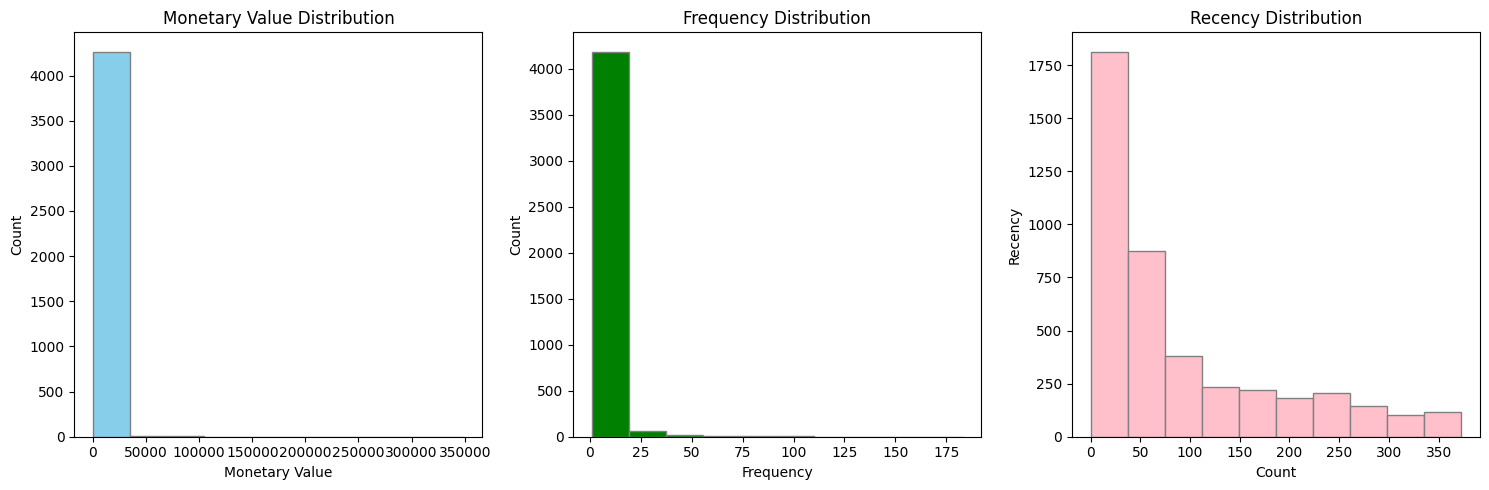

In [318]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='grey')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='green', edgecolor='grey')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=10, color='pink', edgecolor='grey')
plt.title('Recency Distribution')
plt.xlabel('Count')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

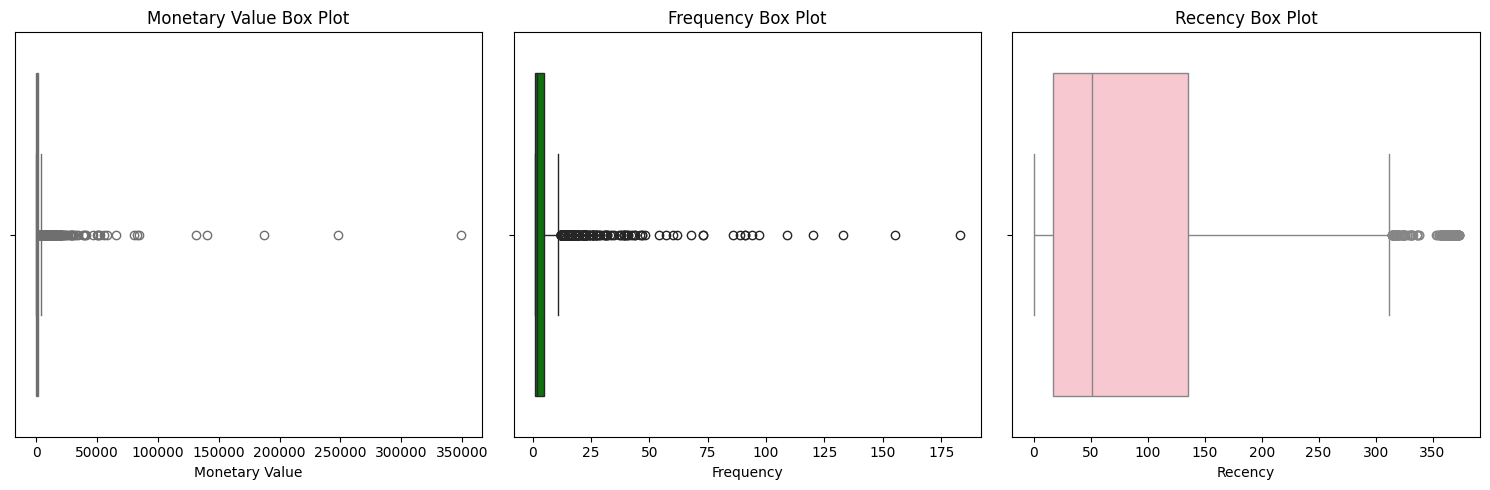

In [319]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df, x='MonetaryValue', color='skyblue')
plt.title('Monetary Value Box Plot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df, x='Frequency', color='green')
plt.title('Frequency Box Plot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df, x='Recency', color='pink')
plt.title('Recency Box Plot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()



## The Strategy to deal with this outliers would be to separate them for further analysis, since those customers have aspent a lot of money and frequent times so we need to investigate them. DO NOT simply remove them from the model

In [320]:
# Interquartile Range to separate aouliers
MQ1 = aggregated_df['MonetaryValue'].quantile(0.25)
MQ3 = aggregated_df['MonetaryValue'].quantile(0.75)
IQR = MQ3 - MQ1

In [321]:
IQR

np.float64(1396.73)

In [322]:
Monetary_outliers = aggregated_df[(aggregated_df['MonetaryValue'] < (MQ1 - 1.5 * IQR)) | (aggregated_df['MonetaryValue'] > (MQ3 + 1.5 * IQR))]


In [323]:
FQR1 = aggregated_df['Frequency'].quantile(0.25)
FQR3 = aggregated_df['Frequency'].quantile(0.75)
IFQR = FQR3 - FQR1

In [324]:
IFQR

np.float64(4.0)

In [325]:
Frequency_outliers = aggregated_df[(aggregated_df['Frequency'] < (FQR1 - 1.5 * IFQR)) | (aggregated_df['Frequency'] > (FQR3 + 1.5 * IFQR))]

In [326]:
Monetary_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [327]:
Frequency_outliers.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [328]:
# Non outliers df
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(Monetary_outliers.index)) & (~aggregated_df.index.isin(Frequency_outliers.index))]

In [329]:
non_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


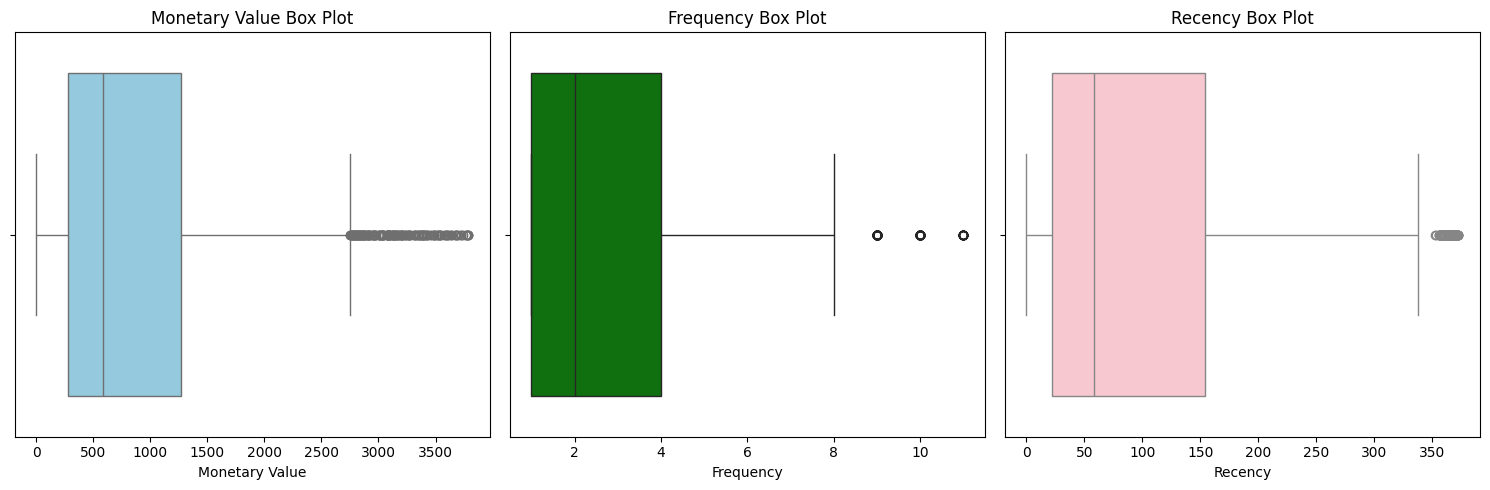

In [330]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df, x='MonetaryValue', color='skyblue')
plt.title('Monetary Value Box Plot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df, x='Frequency', color='green')
plt.title('Frequency Box Plot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df, x='Recency', color='pink')
plt.title('Recency Box Plot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

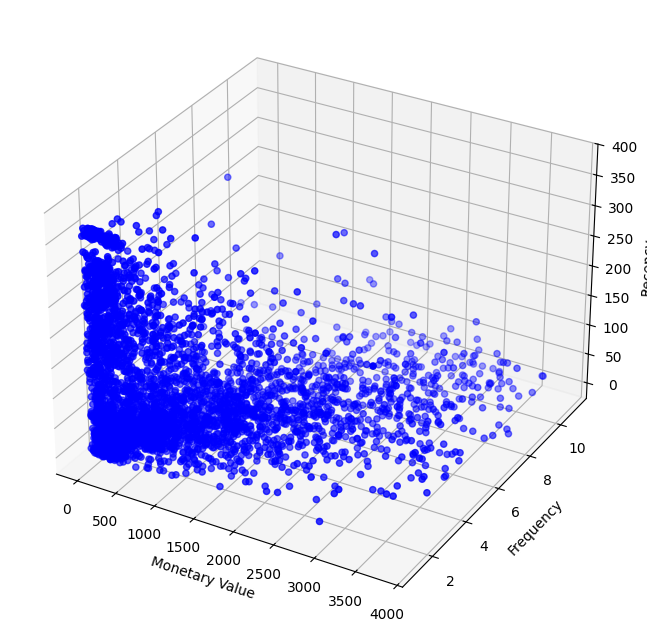

In [331]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

ax.scatter(non_outliers_df['MonetaryValue'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c='blue', marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.show()

# features are in differente scales, we will use standard scaling : mean 0 and sd of 1 (we asumen data is normally distributed)


In [332]:
# scaling

scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[['MonetaryValue', 'Frequency', 'Recency']])
scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [333]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=('MonetaryValue', 'Frequency', 'Recency'))
scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89
...,...,...,...
4280,-0.30,1.40,-0.82
4281,-0.58,-0.83,-0.32
4282,-0.62,-0.83,2.02
4283,0.44,-0.38,0.14


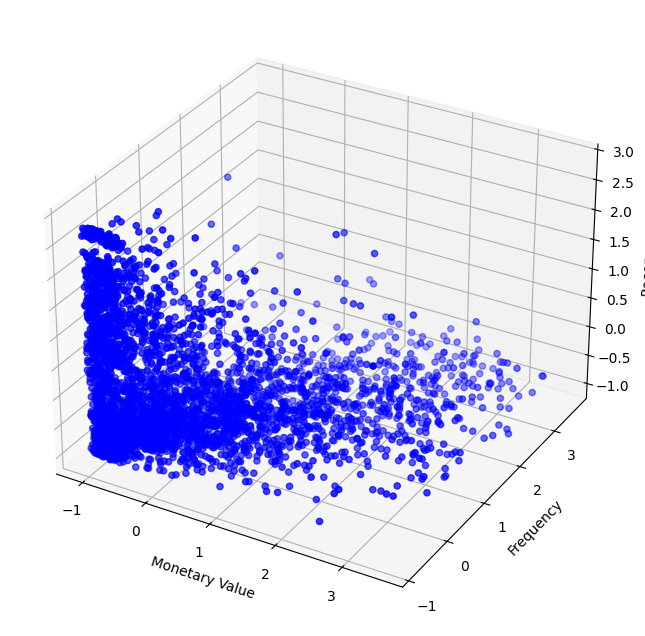

In [334]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection='3d')

ax.scatter(scaled_data_df['MonetaryValue'], scaled_data_df['Frequency'], scaled_data_df['Recency'], c='blue', marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

plt.show()

## KMEANS CLUSTERING

In [335]:
# In K-means, as you increase the number of clusters (k), the distances between points and their centroids will always decrease. If you have $N$ data points and set $k = N$, the distance would be zero because every point is its own centroid.The Elbow Method looks for the "elbow" of the curve—the specific point where adding another cluster doesn't provide a significantly better fit.

max_k = 12

inertia = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000) # 1000 times the centroids will from in a cluster
    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)



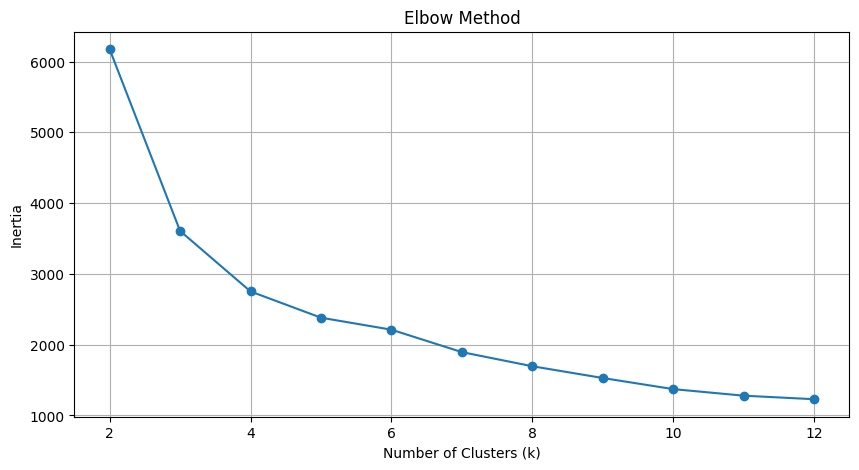

In [336]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [337]:
# to better decide which elbow to chose we will use the Sillhouette Score. Identify overlap among clusters

max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000) # 1000 times the centroids will from in a cluster
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    inertia.append(kmeans.inertia_)


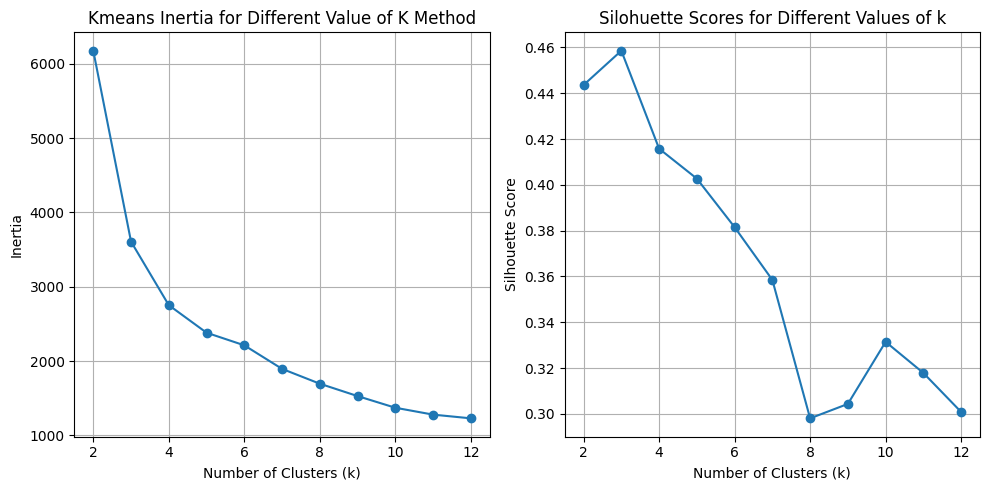

In [338]:

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Kmeans Inertia for Different Value of K Method')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silohuette Scores for Different Values of k')
plt.grid(True)

plt.tight_layout()

plt.show()

The chart shows that 4 cluster has a better Silohuette Score and less chance of overlapping

In [339]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [340]:
non_outliers_df['Cluster'] = cluster_labels

/tmp/ipython-input-2548724979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df['Cluster'] = cluster_labels


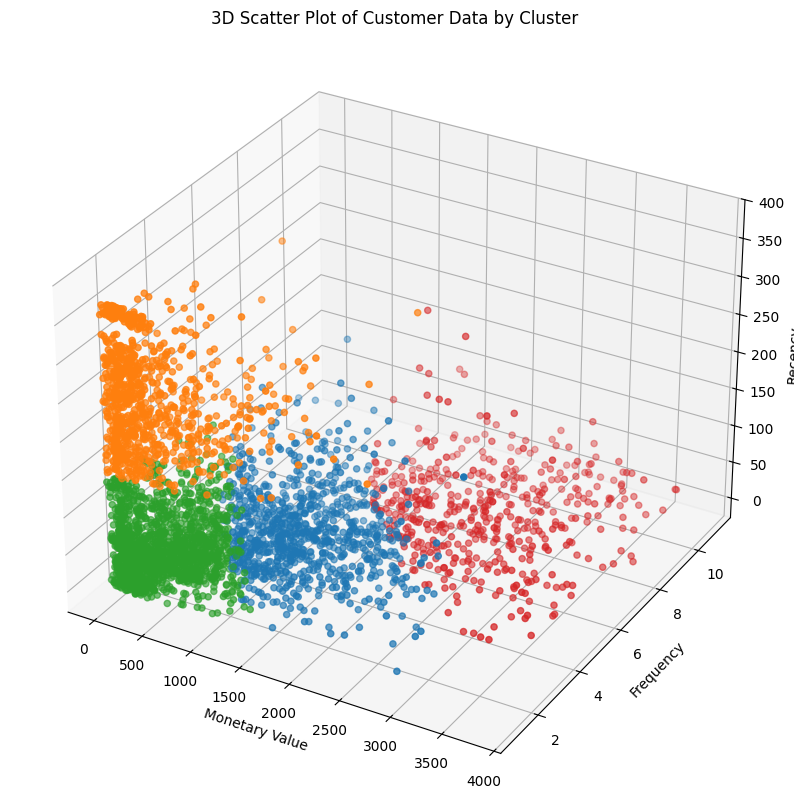

In [341]:
# Define colors for each cluster
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

# Map the cluster IDs to their respective colors
colors = non_outliers_df['Cluster'].map(cluster_colors)

# Initialize the figure and 3D subplot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

# Create the scatter plot
scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,  # Use mapped solid colors
                     marker='o')

# Set axis labels
ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

# Set plot title
ax.set_title('3D Scatter Plot of Customer Data by Cluster')

# Display the plot
plt.show()

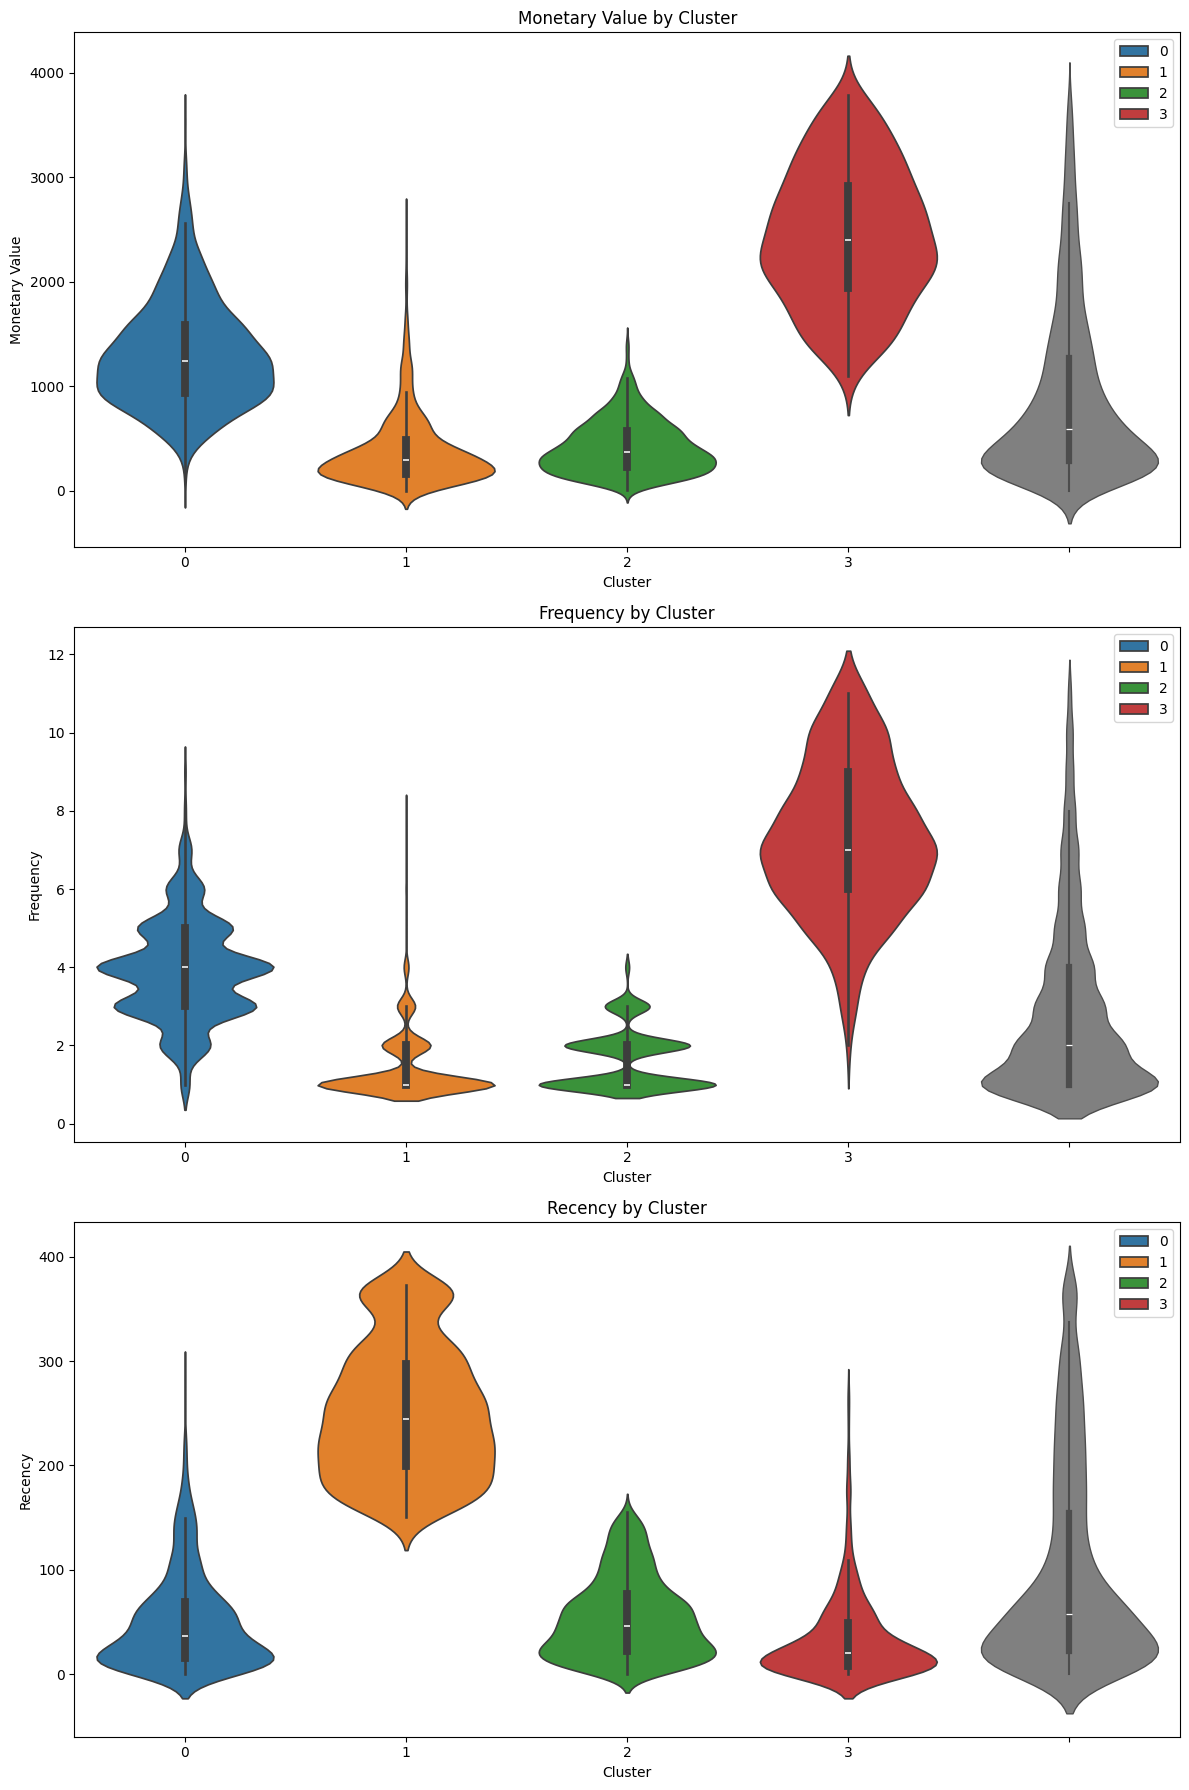

In [342]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall figure size
plt.figure(figsize=(12, 18))

# --- Subplot 1: Monetary Value ---
plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

# --- Subplot 2: Frequency ---
plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

# --- Subplot 3: Recency ---
plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df['Cluster'])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

1. Cluster 0 (Blue): "Retain"

Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.

Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active.

2. Cluster 1 (Orange): "Re-Engage"

Rationale: This group includes lower-value, infrequent buyers who haven't purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.

Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again.

3. Cluster 2 (Green): "Nurture"

Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.

Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. Cluster 3 (Red): "Reward"

Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.

Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.

## Now we need to include the outliears in the analysis

In [343]:
overlap_indexes = Monetary_outliers.index.intersection(Frequency_outliers.index)

monetary_only_outliers = Monetary_outliers.drop(overlap_indexes)
frequency_only_outliers = Frequency_outliers.drop(overlap_indexes)

monetary_and_frequency_outliers = Monetary_outliers.loc[overlap_indexes]

In [344]:
monetary_only_outliers['Cluster'] = -1
frequency_only_outliers['Cluster'] = -2
monetary_and_frequency_outliers['Cluster'] = -3

In [347]:
outlier_clusters = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

In [348]:
outlier_clusters

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3


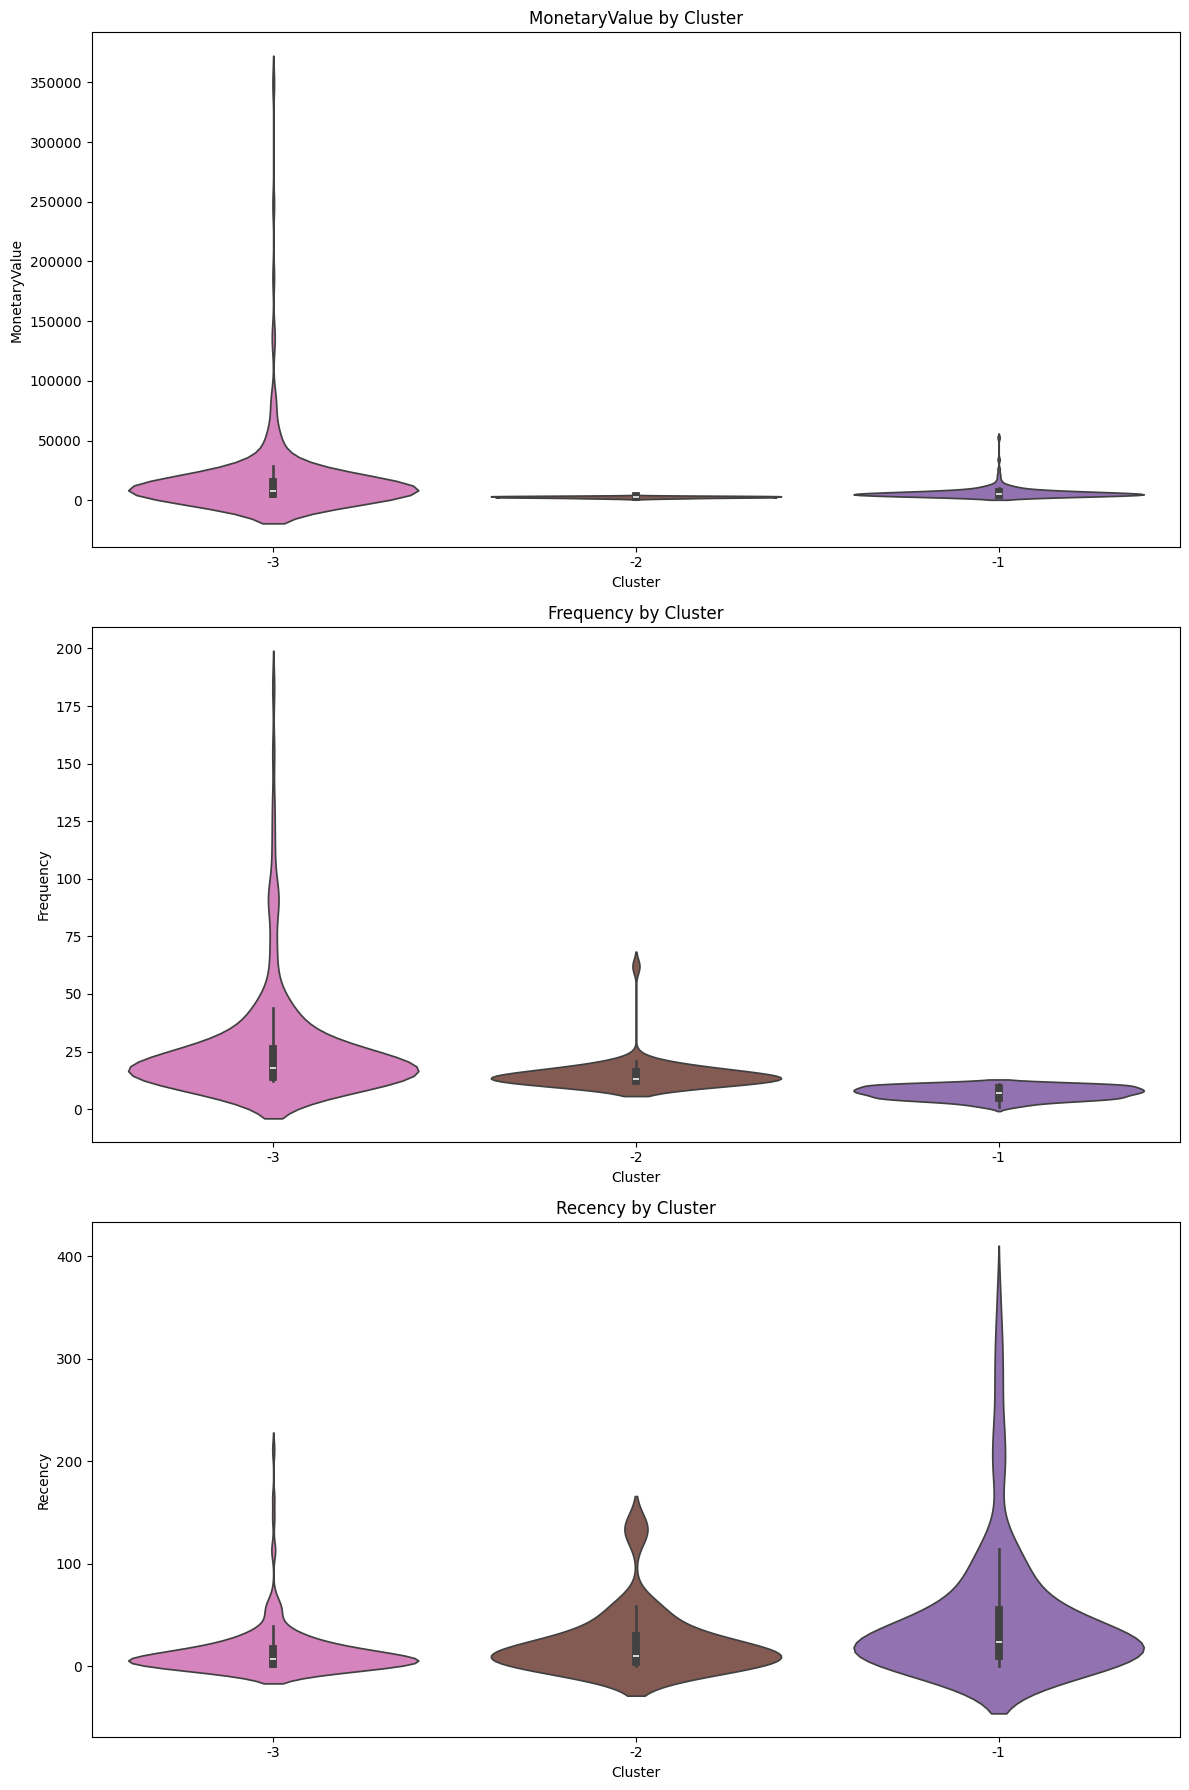

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fixed duplicate keys and corrected spelling
cluster_colors = {
    -1: '#9467bd',  # Purple
    -2: '#8c564b',  # Brown
     -3: '#e377c2'   # Pink (Changed key from -2 to 0 or your next cluster)
}

# Set the overall figure size
plt.figure(figsize=(12, 18))

# Define the features to plot to keep code DRY (Don't Repeat Yourself)
features = ['MonetaryValue', 'Frequency', 'Recency']

for i, feature in enumerate(features, 1):
    plt.subplot(3, 1, i)

    # 2. Corrected spelling: outlier_clusters
    # 3. Removed the redundant second violinplot call
    sns.violinplot(
        data=outlier_clusters,
        x='Cluster',
        y=feature,
        palette=cluster_colors,
        hue='Cluster',
        legend=False
    )

    plt.title(f'{feature} by Cluster')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

Cluster -1 | The "PAMPER" Group (Monetary Outliers)
Characteristics: These are high-value spenders who make large individual purchases but do not visit frequently.

Customer Profile: High spending capacity with low engagement density.

Strategy: Focus on Loyalty & Retention. Use personalized luxury services and exclusive offers to cater to their high-ticket preferences and maintain long-term brand affinity.

Cluster -2 | The "UPSELL" Group (Frequency Outliers)
Characteristics: These customers are highly engaged and shop often, but their average transaction value is relatively low.

Customer Profile: Consistent brand interaction with lower per-visit spend.

Strategy: Focus on Increasing Average Order Value (AOV). Implement bundle deals, tiered loyalty rewards, or upselling tactics to encourage them to spend more during their frequent visits.

Cluster -3 | The "DELIGHT" Group (Monetary & Frequency Outliers)
Characteristics: These are your most valuable "super-users," exhibiting both extreme spending levels and high purchase frequency.

Customer Profile: Top-tier elite customers who represent the highest lifetime value.

Strategy: Focus on VIP Treatment. Develop high-end "white-glove" programs or exclusive, early-access offers to reward their loyalty and ensure they remain highly engaged with the brand.

In [351]:
clusterLabels = {
    0: 'Retain',
    1: 'Re-Engage',
    2: 'Nurture',
    3: 'Reward',
    -1: 'PAMPER',
    -2: 'UPSELL',
    -3: 'DELIGHT'


}

In [352]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters])

In [353]:
full_clustering_df['Cluster'] = full_clustering_df['Cluster'].map(clusterLabels)

In [354]:
full_clustering_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,Re-Engage
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,Retain
2,12348.00,221.16,1,2010-09-27 14:59:00,73,Nurture
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,Retain
4,12351.00,300.93,1,2010-11-29 15:23:00,10,Nurture


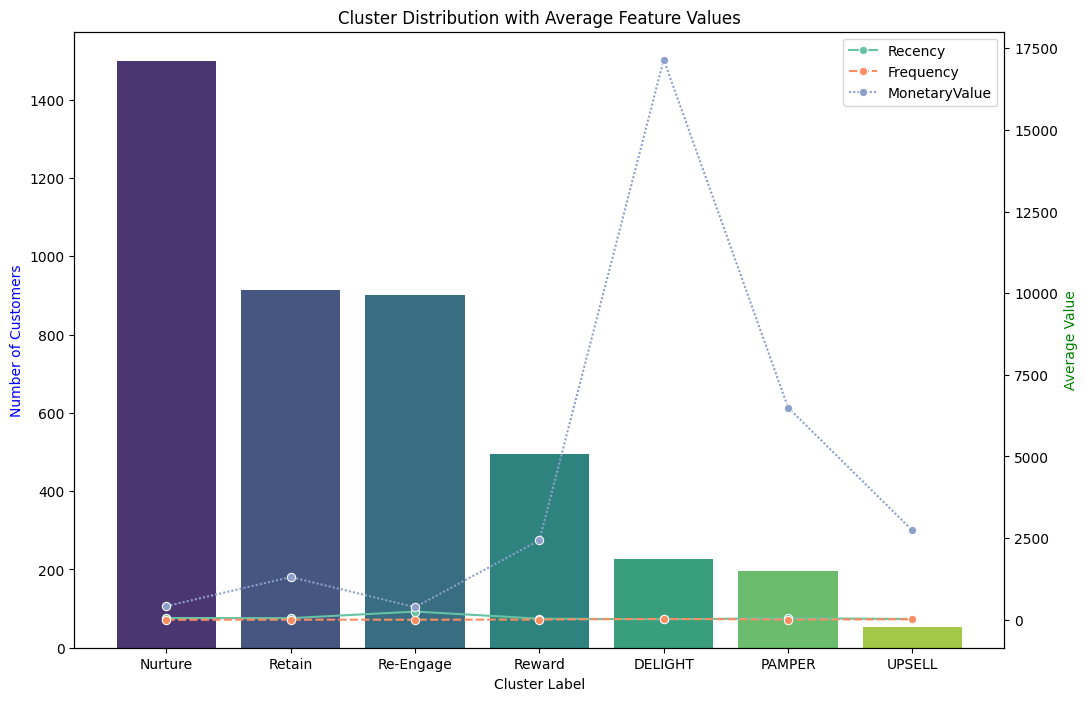

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the data for the plot
# Counts of customers per cluster
cluster_counts = full_clustering_df['Cluster'].value_counts()

# Average Recency, Frequency, and Monetary values per cluster
feature_means = full_clustering_df.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()

# 2. Create the visualization
fig, ax1 = plt.subplots(figsize=(12, 8))

# Primary Axis: Barplot for customer counts
sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    ax=ax1,
    palette='viridis',
    hue=cluster_counts.index,
    legend=False
)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_xlabel('Cluster Label')
ax1.set_title('Cluster Distribution with Average Feature Values')

# Secondary Axis: Lineplot for feature means
ax2 = ax1.twinx()
sns.lineplot(
    data=feature_means,
    ax=ax2,
    palette='Set2',
    marker='o'
)
ax2.set_ylabel('Average Value', color='g')

# Display the final plot
plt.show()